In [0]:
!pip install wordcloud

    100% |████████████████████████████████| 348kB 7.3MB/s 


In [0]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [0]:
def google_authenticate():
  # Authenticate first so the Google Drive library can detect your credentials.
  from google.colab import auth
  auth.authenticate_user()

  from googleapiclient.discovery import build
  drive_service = build('drive', 'v3')
  return drive_service

In [0]:
drive_service = google_authenticate()

In [0]:
def read_file(file_id):
  """ 
  Download file from Google Drive 
  Argument: file_id
  Returns: downloaded file
  """
  
  file_id = file_id

  import io
  from googleapiclient.http import MediaIoBaseDownload

  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
    # _ is a placeholder for a progress object that we ignore.
    # (Our file is small, so we skip reporting progress.)
    _, done = downloader.next_chunk()

  downloaded.seek(0)
  return downloaded
  #print 'Downloaded file contents are:', downloaded.read()

In [0]:
text_file = read_file('1NrodQrpaw-9xU2lCYo8H8fiW6A1RGdwt') # file id of the picture

In [0]:
document = text_file.read()
print(len(document))
print(document[0:100])

148570
﻿Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll

This eBook is for the u


(-0.5, 399.5, 199.5, -0.5)

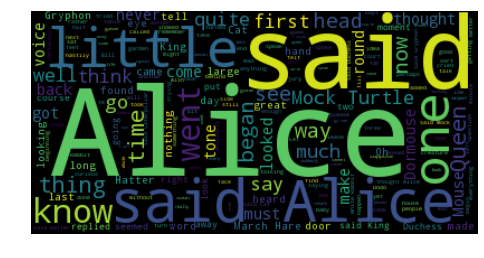

In [0]:
wordcloud = WordCloud().generate(document)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## References
- Word Cloud Python Library: https://github.com/amueller/word_cloud